# 모델 평가 실습 p.366

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.svm import SVC
from sklearn.metrics import f1_score
import time

### 1. 데이터 구성하기

In [2]:
ds_tc = pd.read_csv("실습파일/통신고객이탈.csv")
ds_tc.head()

,CHURN,CUSTOMER_ID,GENDER,AGE,CHARGE_TYPE,HANDSET,USAGE_BAND,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME
0,Active,K102990,F,31,CAT 100,ASAD170,Med,33.33,6,218,379.8,9,21.6,366,632.4
1,Active,K103280,M,27,CAT 100,S50,Med,30.87,10,373,656.4,11,28.0,411,810.4
2,Active,K103660,M,27,CAT 100,ASAD170,Med,49.40,11,260,582.0,0,0.0,265,614.1
3,Active,K103730,M,61,CAT 100,ASAD170,Med,48.60,1,294,661.8,14,101.5,326,844.0
4,Active,K104560,F,52,CAT 100,S50,Med,56.03,0,221,555.6,7,25.0,274,673.0


In [3]:
ds_tc["CHURN"].replace(to_replace = "Active", value = 0, inplace = True)
ds_tc["CHURN"].replace(to_replace = "Churned", value = 1, inplace = True)

In [4]:
ds_tc_dummy = pd.get_dummies(ds_tc.drop(["CHURN", "CUSTOMER_ID"], axis =1, inplace = False))
ds_tc_dummy.head()

,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,31,33.33,6,218,379.8,9,21.6,366,632.4,1,...,0,0,0,0,0,0,1,0,0,0
1,27,30.87,10,373,656.4,11,28.0,411,810.4,0,...,0,0,0,0,0,0,1,0,0,0
2,27,49.40,11,260,582.0,0,0.0,265,614.1,0,...,0,0,0,0,0,0,1,0,0,0
3,61,48.60,1,294,661.8,14,101.5,326,844.0,0,...,0,0,0,0,0,0,1,0,0,0
4,52,56.03,0,221,555.6,7,25.0,274,673.0,1,...,0,0,0,0,0,0,1,0,0,0


In [5]:
from sklearn.model_selection import train_test_split


ds_tc_y = ds_tc["CHURN"]
ds_tc_x = ds_tc_dummy

ds_tc_train_x, ds_tc_test_x, ds_tc_train_y, ds_tc_test_y =\
train_test_split(ds_tc_x, ds_tc_y, test_size=0.30, random_state = 1234)

print("train data X size:{}".format(ds_tc_train_x.shape))
print("train data Y size:{}".format(ds_tc_train_y.shape))
print("test data X size:{}".format(ds_tc_test_x.shape))
print("test data Y size:{}".format(ds_tc_test_y.shape))

train data X size:(651, 33)
train data Y size:(651,)
test data X size:(279, 33)
test data Y size:(279,)


In [6]:
from sklearn.preprocessing import scale

ds_tc_train_x_scaled = scale(ds_tc_train_x,axis = 0)
ds_tc_test_x_scaled = scale(ds_tc_test_x,axis = 0)
pd.DataFrame(ds_tc_train_x_scaled, columns=ds_tc_train_x.columns).head()

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:3: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  This is separate from the ipykernel package so we can avoid doing imports until
/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/ipykernel_launcher.py:4: DataConversionWarning: Data with input dtype uint8, int64, float64 were all converted to float64 by the scale function.
  after removing the cwd from sys.path.


,AGE,SERVICE_DURATION,DROPPED_CALLS,PEAK_CALLS_NO,PEAK_CALLS_TIME,WEEKEND_CALLS_NO,WEEKEND_CALLS_TIME,TOTAL_CALLS_NO,TOTAL_CALLS_TIME,GENDER_F,...,HANDSET_S80,HANDSET_SOP10,HANDSET_SOP20,HANDSET_WC95,USAGE_BAND_High,USAGE_BAND_Low,USAGE_BAND_Med,USAGE_BAND_MedHigh,USAGE_BAND_MedLow,USAGE_BAND_None
0,0.659297,0.121772,-0.191707,1.476872,1.496854,-0.518328,0.678178,1.575792,1.532985,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,-1.105370,1.788854,-0.390144,-0.039223
1,0.736049,0.786591,2.396339,-0.661815,-0.534734,-0.075671,-0.284308,-0.569331,-0.143503,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223
2,-0.415244,1.480625,-0.766829,1.432593,1.087469,-1.024223,-1.356793,0.979029,0.475336,0.915960,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,-1.105370,1.788854,-0.390144,-0.039223
3,-0.568749,1.178499,-0.191707,0.117500,-0.452149,-0.644802,-0.944298,-0.287078,-0.953914,0.915960,...,-0.46075,-0.111542,-0.111542,2.671610,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223
4,0.045274,1.520528,2.108779,-0.431563,-0.870973,-0.771276,1.745163,-0.750780,-0.956148,-1.091751,...,-0.46075,-0.111542,-0.111542,-0.374306,-0.262613,-0.118401,0.904674,-0.559017,-0.390144,-0.039223


### 2. 분류 모델링 실행

In [7]:
model = ["DesisonTree","RandomForest", "GradientBoosting", "SVM"]

train_accuracy = []
test_accuracy = []
model_f1_score = []
time_socre = []

In [8]:
tree = DecisionTreeClassifier(criterion='gini', max_depth=10, min_samples_leaf=30, random_state=1234)

start= time.time()

tree.fit(ds_tc_train_x_scaled, ds_tc_train_y)
train_accuracy.append(tree.score(ds_tc_train_x_scaled, ds_tc_train_y))
test_accuracy.append(tree.score(ds_tc_test_x_scaled, ds_tc_test_y))
model_f1_score.append(f1_score(ds_tc_test_y, tree.predict(ds_tc_test_x_scaled)))
time_socre.append(time.time()-start)

In [9]:
rf = RandomForestClassifier(criterion='gini', n_estimators=500, max_depth=4, min_samples_leaf=30, random_state=1234)

start= time.time()

rf.fit(ds_tc_train_x_scaled, ds_tc_train_y)
train_accuracy.append(rf.score(ds_tc_train_x_scaled, ds_tc_train_y))
test_accuracy.append(rf.score(ds_tc_test_x_scaled, ds_tc_test_y))
model_f1_score.append(f1_score(ds_tc_test_y, rf.predict(ds_tc_test_x_scaled)))
time_socre.append(time.time()-start)

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [10]:
gb = GradientBoostingClassifier(learning_rate=0.1, max_depth=4, min_samples_leaf=30, n_estimators=5, random_state=1234)

start= time.time()

gb.fit(ds_tc_train_x_scaled, ds_tc_train_y)
train_accuracy.append(gb.score(ds_tc_train_x_scaled, ds_tc_train_y))
test_accuracy.append(gb.score(ds_tc_test_x_scaled, ds_tc_test_y))
model_f1_score.append(f1_score(ds_tc_test_y, gb.predict(ds_tc_test_x_scaled)))
time_socre.append(time.time()-start)

/home/pirl/anaconda3/envs/py35/lib/python3.5/site-packages/sklearn/metrics/classification.py:1143: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


In [11]:
svm = SVC(C=6, gamma = 0.1, random_state=1234)

start= time.time()

svm.fit(ds_tc_train_x_scaled, ds_tc_train_y)
train_accuracy.append(svm.score(ds_tc_train_x_scaled, ds_tc_train_y))
test_accuracy.append(svm.score(ds_tc_test_x_scaled, ds_tc_test_y))
model_f1_score.append(f1_score(ds_tc_test_y, svm.predict(ds_tc_test_x_scaled)))
time_socre.append(time.time()-start)

In [12]:
ds_eval = pd.DataFrame(index=model)
ds_eval["TrainAccuracy"] = train_accuracy
ds_eval["TestAccuracy"] = test_accuracy
ds_eval["F1Score"] = model_f1_score
ds_eval["Time"] = time_socre
ds_eval.round(3)

,TrainAccuracy,TestAccuracy,F1Score,Time
DesisonTree,0.848,0.871,0.50,0.013
RandomForest,0.791,0.842,0.00,0.562
GradientBoosting,0.791,0.842,0.00,0.011
SVM,0.995,0.871,0.55,0.094


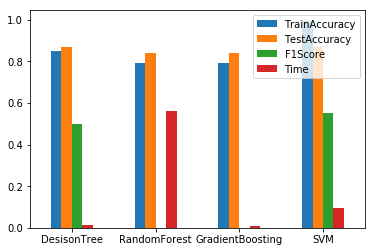

In [13]:
ds_eval.plot.bar(rot=0)

In [14]:
y_pred = svm.predict(ds_tc_test_x_scaled) 

In [15]:
import pandas as pd

y_true = ds_tc_test_y
y_pred = svm.predict(ds_tc_test_x_scaled) 

cunfu_table = pd.crosstab(y_true, y_pred, rownames=['True'], colnames=['Predicted'], margins=True)
cunfu_table

Predicted,0,1,All
True,,,
0,221,14,235
1,22,22,44
All,243,36,279


In [16]:
from sklearn.metrics import confusion_matrix
table = pd.DataFrame(confusion_matrix(y_true, y_pred, labels=[1, 0]),columns=[1,0], index=[1,0])
table

,1,0
1,22,22
0,14,221


In [28]:
my_list = list(map(list,table.values))
answer = sum(my_list, [])
answer

[22, 22, 14, 221]

In [29]:
TP, FN, FP, TN = answer
print(TP, FN, FP, TN)

22 22 14 221


In [30]:
accuracy = (TP+TN)/sum(answer)
misclassification =1-accuracy
sensitivity =TP/(TP+FN)
specificity =TN/(FP+TN)

print("Accuracy :{}".format(accuracy))
print("Misclassification :{}".format(misclassification))
print("Sensitivity :{}".format(sensitivity))
print("Specificity :{}".format(specificity))

Accuracy :0.8709677419354839
Misclassification :0.12903225806451613
Sensitivity :0.5
Specificity :0.9404255319148936


In [31]:
answer2= [26, 13, 5, 455]
TP, FN, FP, TN = answer2
print(TP, FN, FP, TN)

26 13 5 455


In [32]:
accuracy = (TP+TN)/sum(answer2)
misclassification =1-accuracy
sensitivity =TP/(TP+FN)
specificity =TN/(FP+TN)

print("Accuracy :{}".format(accuracy))
print("Misclassification :{}".format(misclassification))
print("Sensitivity :{}".format(sensitivity))
print("Specificity :{}".format(specificity))

Accuracy :0.9639278557114228
Misclassification :0.03607214428857719
Sensitivity :0.6666666666666666
Specificity :0.9891304347826086
